In [4]:
#Basic packages
import numpy as np
import pandas as pd
from sklearn.utils import shuffle #to shuffle data
import matplotlib.pyplot as plt


#Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb

#Hyperparameter tuning of Models and train test split
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
#Evaluation of model
from sklearn.metrics import mean_squared_error

#For neural nets
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#to check the time for each model
import time

In [6]:
data = pd.read_csv("./final_draft.csv")

In [7]:
data['time'] = pd.to_datetime(data['time']).astype(int) / 10**9
features = ['latitude', 'longitude', 'depth', 'time', 'seismic_energy']
target = 'mag'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
svr_model = SVR(kernel='linear')
start_time = time.time()
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
end_time = time.time()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)
print(f"Time Taken : {end_time - start_time}")




Root Mean Squared Error: 1.5676823275462362
Time Taken : 552.1625111103058


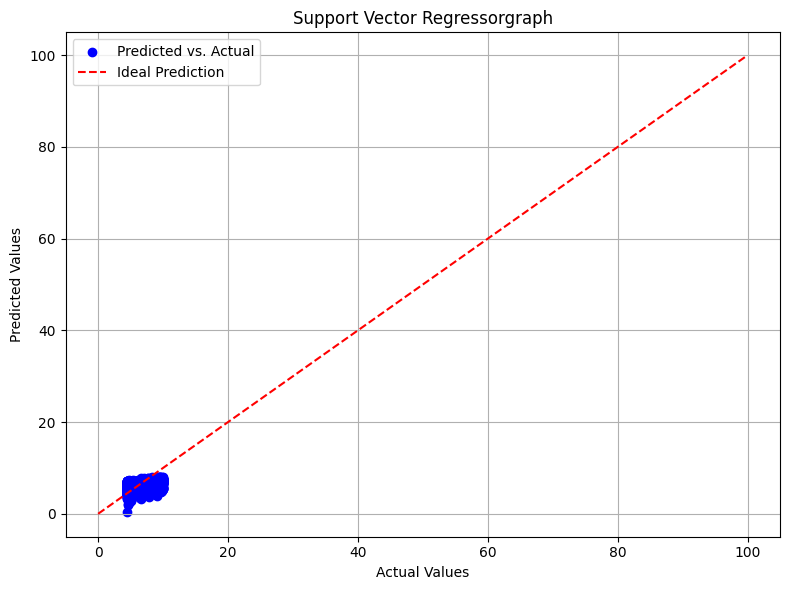

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Ideal Prediction')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regressorgraph')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
svr_model = SVR()
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']
}
start_time = time.time()
grid_search_svr = GridSearchCV(svr_model, param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_train, y_train)
best_svr_model = grid_search_svr.best_estimator_
svr_pred = best_svr_model.predict(X_test)
end_time = time.time()

svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
print(f"Time Taken : {end_time - start_time}")
print("Root Mean Squared Error SVR(GridSearch):", svr_rmse)

# use randomsearch and specify iterations.


